/root/miniconda3/envs/paul/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1563/1563 [05:58<00:00,  4.36it/s]
/tmp/ipykernel_294154/3982291820.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.asanyarray(data_list).shape)


(1563,)
(100000, 9)


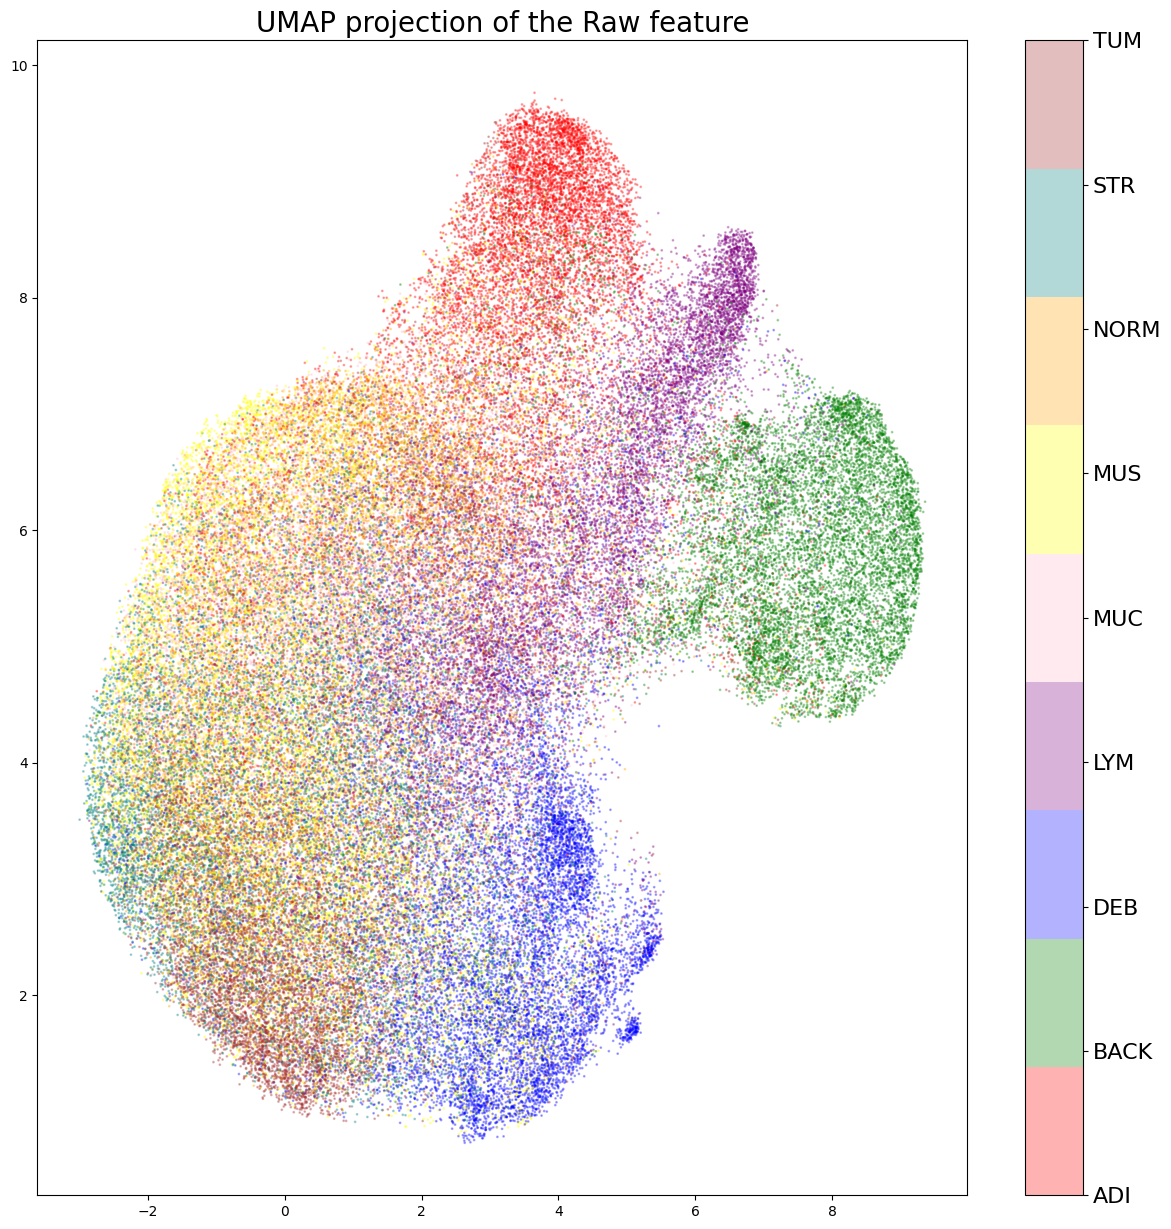

In [1]:
from transFDA import *
import torch.utils.data as data
from img_set import *
import torch
from torchvision import transforms
import umap
import timm
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

train_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
    # transforms.Grayscale(num_output_channels=1)
test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
# Define your PyTorch dataset
my_dataset = ImgSet(root='/root/autodl-tmp/NCT-CRC-HE-100K-NONORM',transform_list=[train_transform])
class_dict=my_dataset.class_to_idx
# my_dataset, val_dataset = torch.utils.data.random_split(my_dataset, [int(len(my_dataset)*0.99), len(my_dataset)-int(len(my_dataset)*0.99)])
model=timm.create_model('resnet18', pretrained=True,num_classes=9)
model.to(device)
# Define a PyTorch dataloader
dataloader = data.DataLoader(my_dataset, batch_size=64, shuffle=True, pin_memory=False)
# Extract the data from the PyTorch dataset
data_list = []
targets=[]
torch.cuda.empty_cache()
for data_batch,target in tqdm(dataloader):
    feature=model(data_batch.squeeze(1).to(device))
    data_list.append(feature.detach().cpu().numpy().reshape(len(feature),-1))
    targets.extend(list(target.numpy()))
print(np.asanyarray(data_list).shape)
data_array = np.concatenate(data_list, axis=0)
print(data_array.shape)
# Use UMAP to reduce the dimensionality of the data

umap_result = umap.UMAP(n_neighbors=15).fit_transform(data_array)

# Visualize the results
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
cmap = mpl_colors.ListedColormap(['red', 'green', 'blue', 'purple','pink','yellow','orange','teal','brown'])
fig=plt.figure(figsize=(15,15))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=targets, cmap=cmap, s=1,alpha=0.3)
plt.title('UMAP projection of the Raw feature',fontsize=20)
cb=plt.colorbar(ticks=range(9))
cb.ax.set_yticklabels(class_dict.keys(),fontsize=16)
plt.savefig('./umap/raw_umap_feature.png')


100%|██████████| 1563/1563 [05:15<00:00,  4.95it/s]
/tmp/ipykernel_294154/130455840.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.asanyarray(data_list).shape)


(1563,)
(100000, 9)


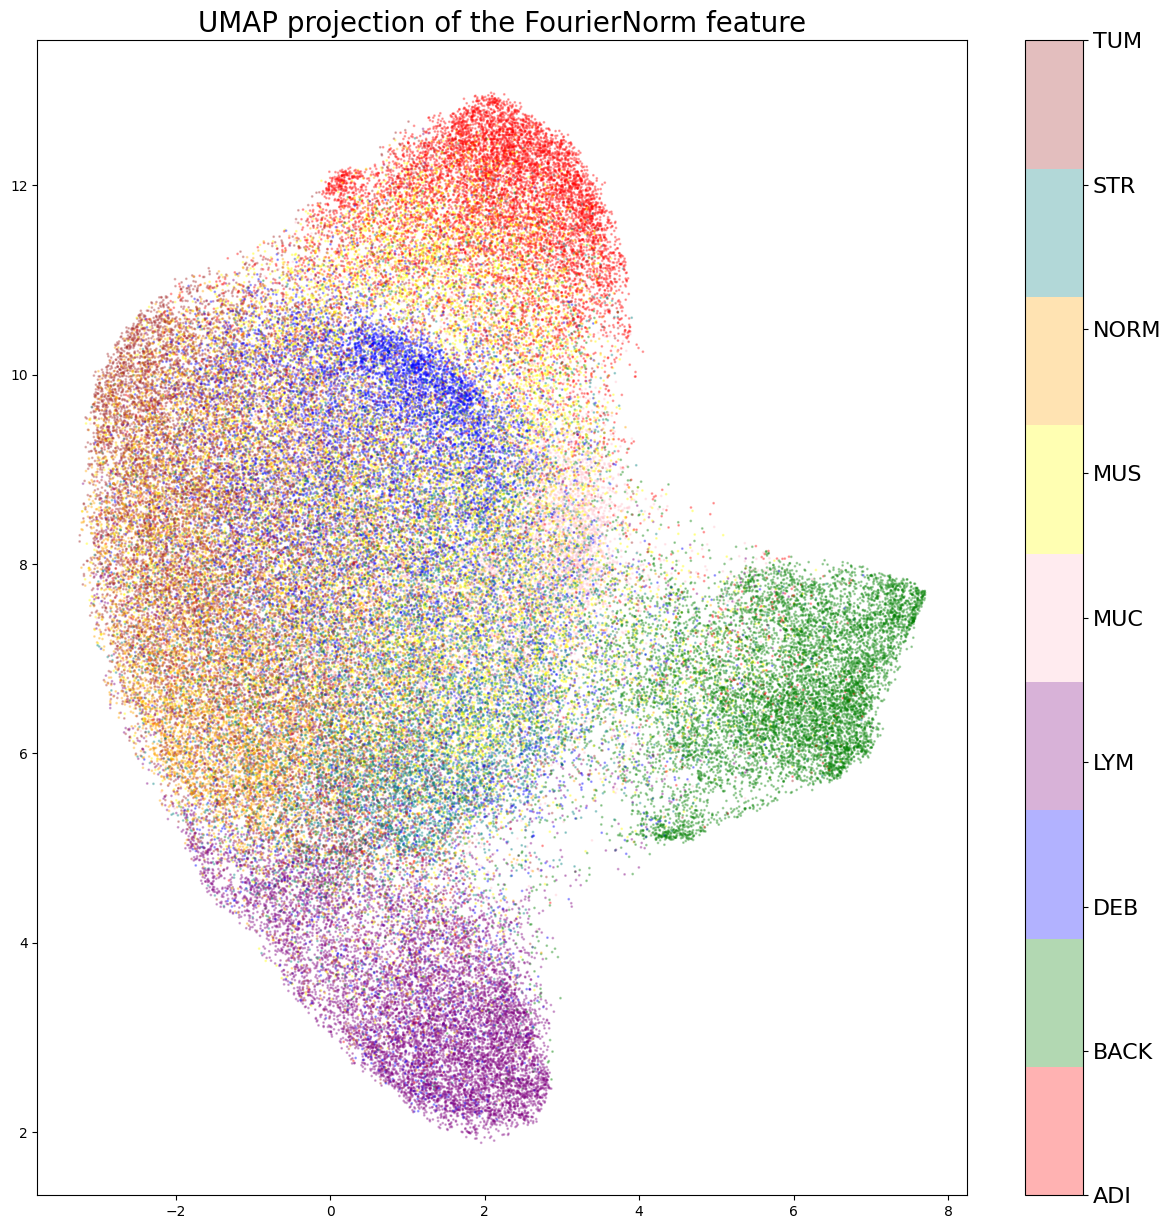

In [2]:
from transFDA import *
import torch.utils.data as data
from img_set import *
import torch
from torchvision import transforms
import umap
import timm
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

train_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
    # transforms.Grayscale(num_output_channels=1)
test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
# Define your PyTorch dataset
my_dataset = ImgSet(root='/root/autodl-tmp/result/1/fda',transform_list=[train_transform])
class_dict=my_dataset.class_to_idx
# my_dataset, val_dataset = torch.utils.data.random_split(my_dataset, [int(len(my_dataset)*0.99), len(my_dataset)-int(len(my_dataset)*0.99)])
model=timm.create_model('resnet18', pretrained=True,num_classes=9)
model.to(device)
# Define a PyTorch dataloader
dataloader = data.DataLoader(my_dataset, batch_size=64, shuffle=True, pin_memory=False)
# Extract the data from the PyTorch dataset
data_list = []
targets=[]
torch.cuda.empty_cache()
for data_batch,target in tqdm(dataloader):
    feature=model(data_batch.squeeze(1).to(device))
    data_list.append(feature.detach().cpu().numpy().reshape(len(feature),-1))
    targets.extend(list(target.numpy()))
print(np.asanyarray(data_list).shape)
data_array = np.concatenate(data_list, axis=0)
print(data_array.shape)
# Use UMAP to reduce the dimensionality of the data

umap_result = umap.UMAP(n_neighbors=15).fit_transform(data_array)

# Visualize the results
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
cmap = mpl_colors.ListedColormap(['red', 'green', 'blue', 'purple','pink','yellow','orange','teal','brown'])
fig=plt.figure(figsize=(15,15))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=targets, cmap=cmap, s=1,alpha=0.3)
plt.title('UMAP projection of the FourierNorm feature',fontsize=20)
cb=plt.colorbar(ticks=range(9))
cb.ax.set_yticklabels(class_dict.keys(),fontsize=16)
plt.savefig('./umap/fda_umap_feature.png')

100%|██████████| 1563/1563 [05:23<00:00,  4.83it/s]
/tmp/ipykernel_294154/3042558758.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.asanyarray(data_list).shape)


(1563,)
(100000, 9)


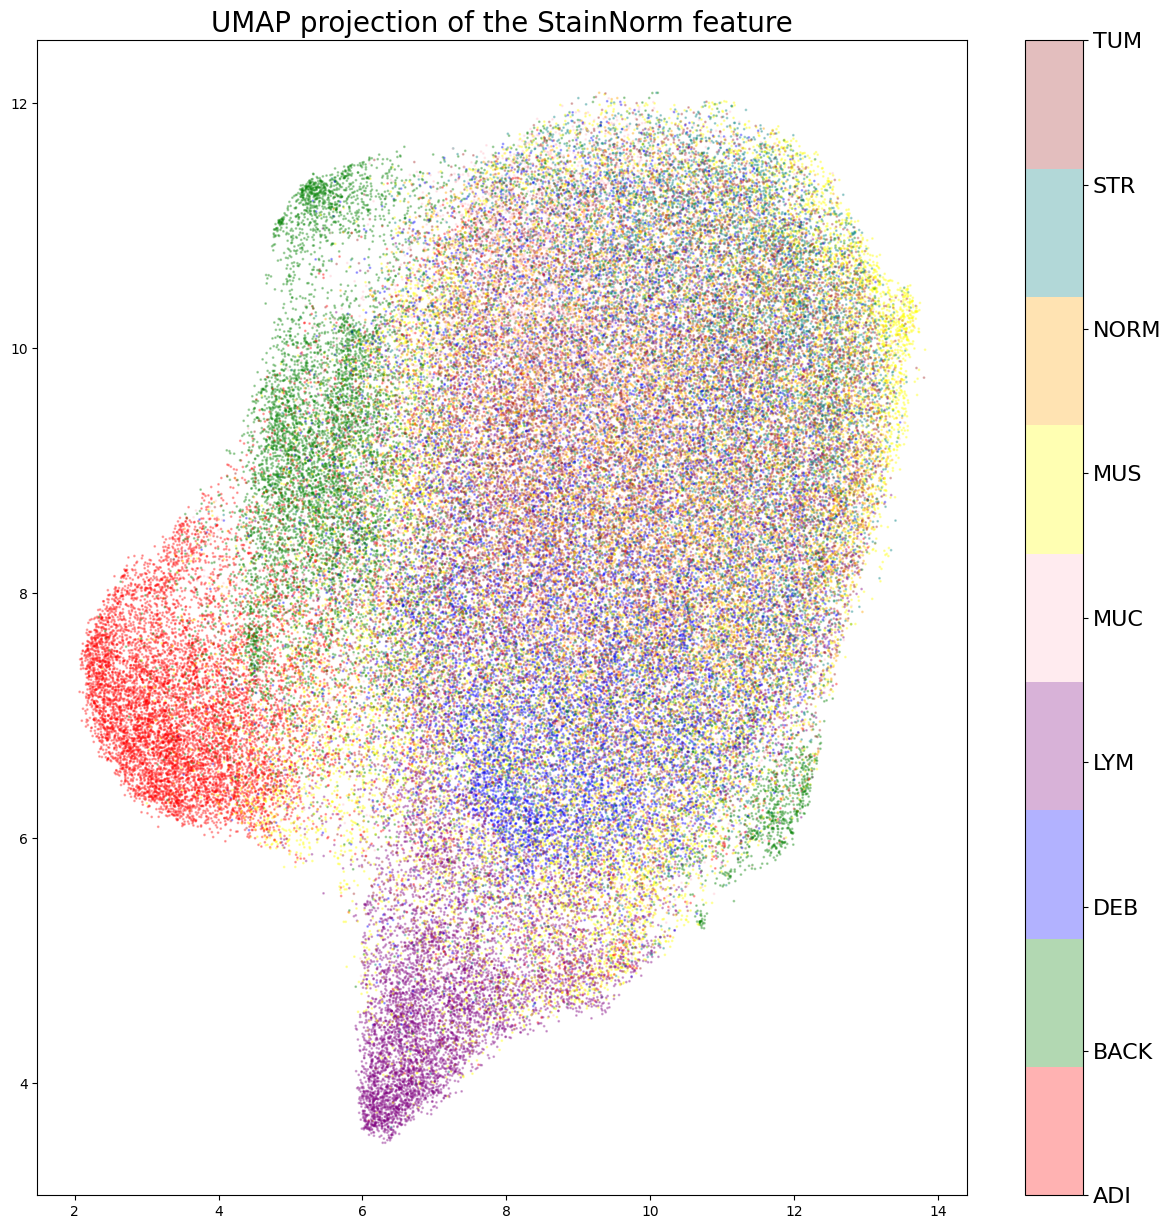

In [3]:
from transFDA import *
import torch.utils.data as data
from img_set import *
import torch
from torchvision import transforms
import umap
import timm
from tqdm import tqdm
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

train_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
    # transforms.Grayscale(num_output_channels=1)
test_transform=transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
# Define your PyTorch dataset
my_dataset = ImgSet(root='/root/autodl-tmp/result/1/stain',transform_list=[train_transform])
class_dict=my_dataset.class_to_idx
# my_dataset, val_dataset = torch.utils.data.random_split(my_dataset, [int(len(my_dataset)*0.99), len(my_dataset)-int(len(my_dataset)*0.99)])
model=timm.create_model('resnet18', pretrained=True,num_classes=9)
model.to(device)
# Define a PyTorch dataloader
dataloader = data.DataLoader(my_dataset, batch_size=64, shuffle=True, pin_memory=False)
# Extract the data from the PyTorch dataset
data_list = []
targets=[]
torch.cuda.empty_cache()
for data_batch,target in tqdm(dataloader):
    feature=model(data_batch.squeeze(1).to(device))
    data_list.append(feature.detach().cpu().numpy().reshape(len(feature),-1))
    targets.extend(list(target.numpy()))
print(np.asanyarray(data_list).shape)
data_array = np.concatenate(data_list, axis=0)
print(data_array.shape)
# Use UMAP to reduce the dimensionality of the data

umap_result = umap.UMAP(n_neighbors=15).fit_transform(data_array)

# Visualize the results
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
cmap = mpl_colors.ListedColormap(['red', 'green', 'blue', 'purple','pink','yellow','orange','teal','brown'])
fig=plt.figure(figsize=(15,15))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=targets, cmap=cmap, s=1,alpha=0.3)
plt.title('UMAP projection of the StainNorm feature',fontsize=20)
cb=plt.colorbar(ticks=range(9))
cb.ax.set_yticklabels(class_dict.keys(),fontsize=16)
plt.savefig('./umap/stain_umap_feature.png')